In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/Gold Price (2013-2023).csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


In [ ]:
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-12-30,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%
2022-12-29,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%
2022-12-28,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%
2022-12-27,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%
2022-12-26,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%


In [ ]:


df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''), errors='coerce')

# Use  price for prediction
data = df['Price'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for LSTM
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i + seq_length]
        target = data[i + seq_length]
        sequences.append((sequence, target))
    return np.array(sequences)

seq_length = 10
sequences = create_sequences(scaled_data, seq_length)

# Split data into train and test sets
X = np.array([seq[0] for seq in sequences])
y = np.array([seq[1] for seq in sequences])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
predicted_data = model.predict(X_test)

# Inverse transform the predictions to get original scale
predicted_data = scaler.inverse_transform(predicted_data)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))



<ipython-input-21-ec25f2923597>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(sequences)


Epoch 1/50
65/65 [==============================] - 3s 12ms/step - loss: 0.0597 - val_loss: 0.0012
Epoch 2/50
65/65 [==============================] - 1s 8ms/step - loss: 8.1444e-04 - val_loss: 7.1195e-04
Epoch 3/50
65/65 [==============================] - 1s 8ms/step - loss: 6.6074e-04 - val_loss: 6.8338e-04
Epoch 4/50
65/65 [==============================] - 1s 8ms/step - loss: 6.0760e-04 - val_loss: 6.1033e-04
Epoch 5/50
65/65 [==============================] - 1s 9ms/step - loss: 5.9317e-04 - val_loss: 5.8784e-04
Epoch 6/50
65/65 [==============================] - 1s 8ms/step - loss: 5.7429e-04 - val_loss: 6.4873e-04
Epoch 7/50
65/65 [==============================] - 1s 8ms/step - loss: 5.5743e-04 - val_loss: 6.5682e-04
Epoch 8/50
65/65 [==============================] - 1s 8ms/step - loss: 5.3291e-04 - val_loss: 5.6005e-04
Epoch 9/50
65/65 [==============================] - 1s 8ms/step - loss: 5.8439e-04 - val_loss: 5.6517e-04
Epoch 10/50
65/65 [==============================] - 

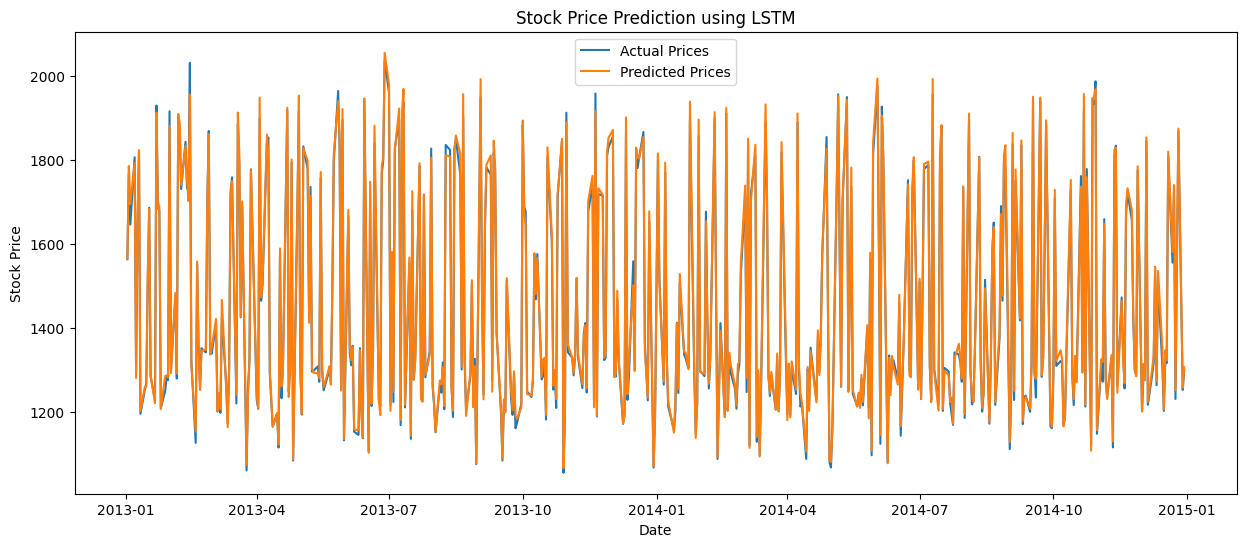

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual Prices')
plt.plot(df.index[-len(y_test):], predicted_data, label='Predicted Prices')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

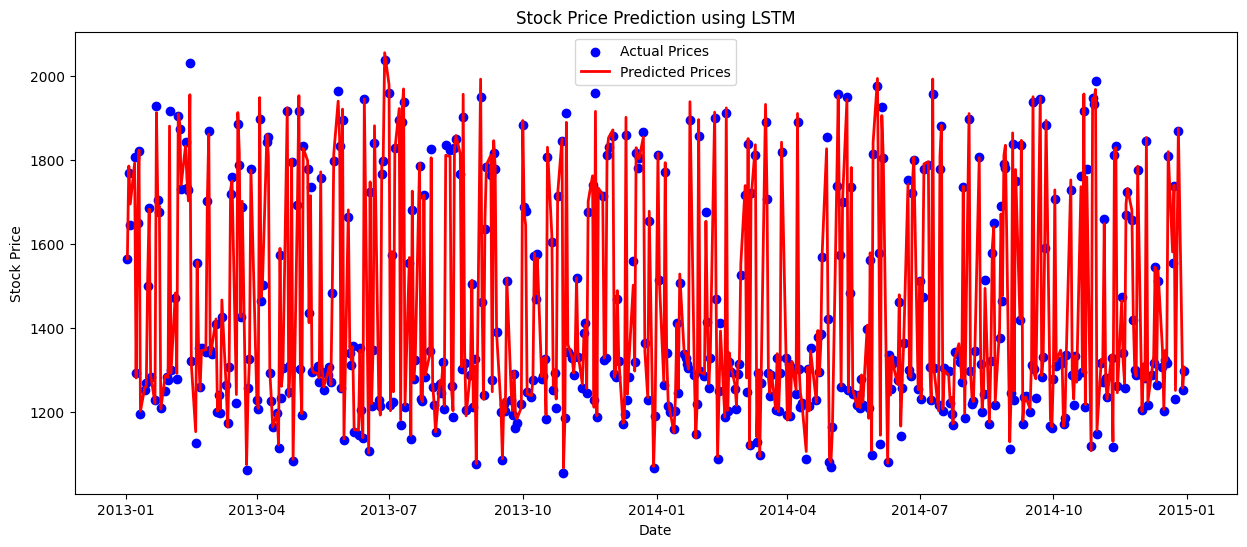

In [ ]:
plt.figure(figsize=(15, 6))
plt.scatter(df.index[-len(y_test):], y_test, label='Actual Prices', color='blue')
plt.plot(df.index[-len(y_test):], predicted_data, label='Predicted Prices', color='red', linewidth=2)
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


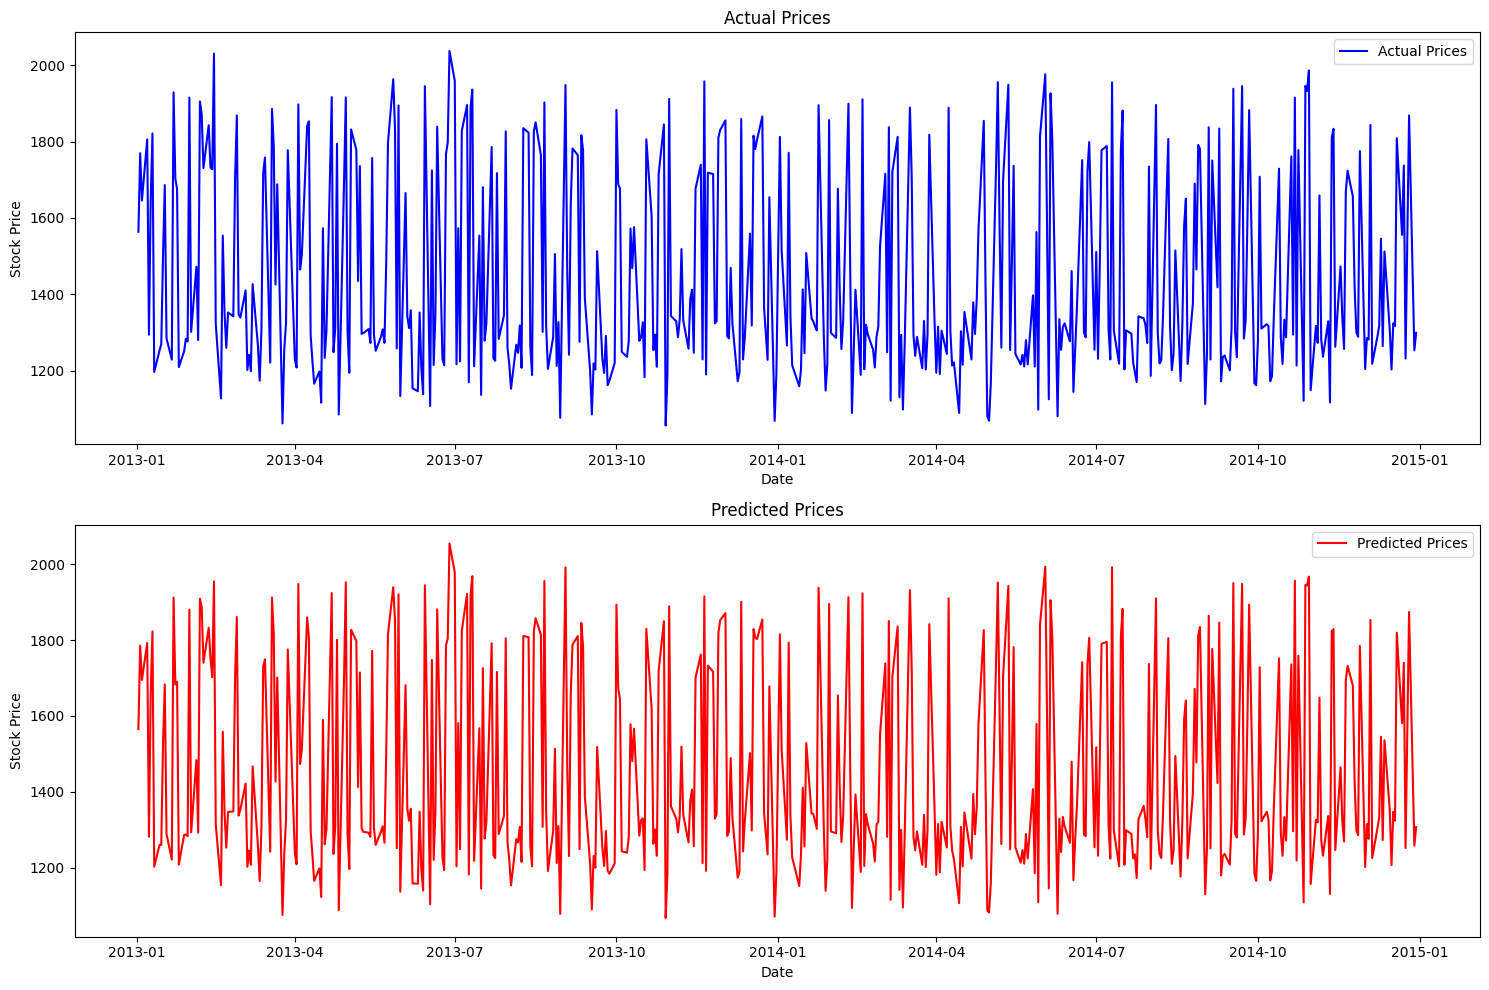

In [ ]:
plt.figure(figsize=(15, 10))

# Actual Prices
plt.subplot(2, 1, 1)
plt.plot(df.index[-len(y_test):], y_test, label='Actual Prices', color='blue')
plt.title('Actual Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# Predicted Prices
plt.subplot(2, 1, 2)
plt.plot(df.index[-len(y_test):], predicted_data, label='Predicted Prices', color='red')
plt.title('Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

plt.tight_layout()
plt.show()
